# Animal Sleep

Some animals, such as elephants, sleep only 3-4 hours a night, while others, like bats, can sleep up to 20 hours.

Is there a relationship between sleep duration and body mass? Is a species' diet correlated with sleep time?

The file `animal-sleep.csv` provides data on the average sleep duration of 77 animal species, along with their average body mass in kilograms.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'animal-sleep.csv' and 'linear_model.py'.

# from google.colab import files
# uploaded = files.upload()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from linear_model import LinearModel

df = pd.read_csv('animal-sleep.csv')
df.head()

,animal,diet,sleep,mass
0,african elephant,herbivore,3.3,6654.000
1,african giant pouched rat,omnivore,8.3,1.000
2,african striped mouse,herbivore,8.7,0.044
3,arctic fox,carnivore,12.5,3.380
4,arctic ground squirrel,omnivore,16.6,0.920


Text(0, 0.5, 'hours of sleep per day')

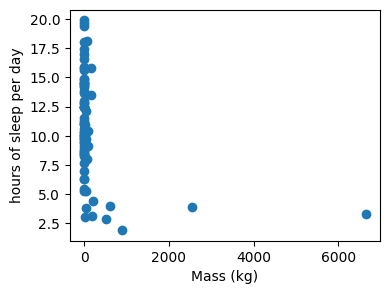

In [3]:
plt.figure(figsize=(4, 3))
plt.scatter(df['mass'], df['sleep'])
plt.xlabel('Mass (kg)')
plt.ylabel('hours of sleep per day')

We see that the mass data exhibits a strong right skew with a long tail. A log transformation can convert an exponential relationship into a linear one, making it easier to model with linear regression.

In [4]:
import math
df['log10_mass'] = df['mass'].apply(math.log10)  # apply the function to each element
df.head()

,animal,diet,sleep,mass,log10_mass
0,african elephant,herbivore,3.3,6654.000,3.823083
1,african giant pouched rat,omnivore,8.3,1.000,0.000000
2,african striped mouse,herbivore,8.7,0.044,-1.356547
3,arctic fox,carnivore,12.5,3.380,0.528917
4,arctic ground squirrel,omnivore,16.6,0.920,-0.036212


Below is code for plotting the data using the log scale.

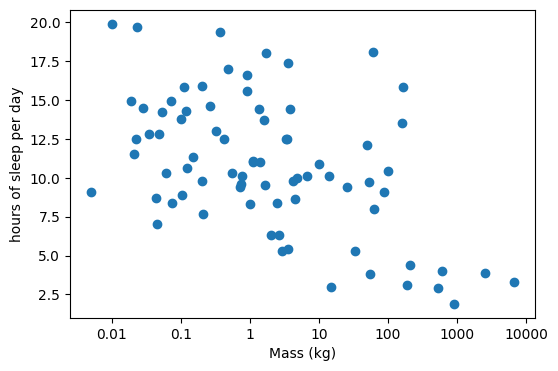

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(df['log10_mass'], df['sleep'])
plt.xlabel('Mass (kg)')
plt.ylabel('hours of sleep per day')
xticks = [-2, -1, 0, 1, 2, 3, 4]
xtick_labels = [0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.xticks(xticks, xtick_labels)
plt.show()

### Project Ideas

- Model the relationship between `log10_mass` and hours of `sleep`.

- Create three separate linear models for each `diet` category: carnivores, omnivores, and herbivores.

- Visualize the data and their best-fit lines on a single plot with distinct colors and symbols for each `diet` category, or use separate plots if more suitable.

- Explore and propose mechanisms that could explain the results, potentially involving additional research.

In [6]:
# YOUR CODE HERE (add additional cells as needed)

# Linear model API

# linear = LinearModel()
# linear.fit(x, y)
# linear.predict(x)
# linear.plot_model(x_min, x_max, color="black")
# linear.print_model_info(self):


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the CSV
df = pd.read_csv('animal-sleep.csv')

# Add a log-transformed mass column
df['log10_mass'] = np.log10(df['mass'])

                       animal       diet  sleep      mass  log10_mass
0            african elephant  herbivore    3.3  6654.000    3.823083
1   african giant pouched rat   omnivore    8.3     1.000    0.000000
2       african striped mouse  herbivore    8.7     0.044   -1.356547
3                  arctic fox  carnivore   12.5     3.380    0.528917
4      arctic ground squirrel   omnivore   16.6     0.920   -0.036212
..                        ...        ...    ...       ...         ...
72                 tree hyrax  herbivore    5.3     2.950    0.469822
73                 tree shrew   omnivore    8.9     0.104   -0.982967
74               vesper mouse   omnivore    7.0     0.045   -1.346787
75                      vole   herbivore   12.8     0.035   -1.455932
76  western american chipmunk   omnivore   14.9     0.071   -1.148742

[77 rows x 5 columns]


In [ ]:
# Split the Data by Diet Type
herbivores = df[df['diet'] == 'herbivore']
carnivores = df[df['diet'] == 'carnivore']
omnivores = df[df['diet'] == 'omnivore']

In [ ]:
# Fit Linear Models
def fit_model(data):
    X = data[['log10_mass']]
    y = data['sleep']
    model = LinearRegression()
    model.fit(X, y)
    return model

model_herb = fit_model(herbivores)
model_carn = fit_model(carnivores)
model_omn = fit_model(omnivores)

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


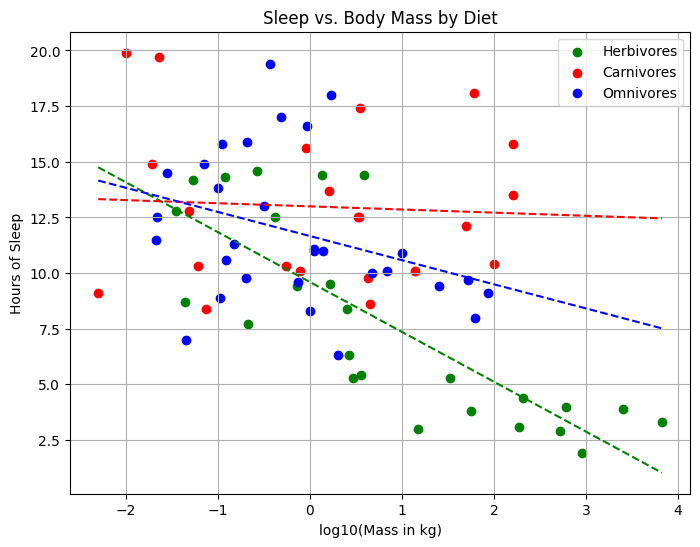

In [ ]:
# Plot
plt.figure(figsize=(8, 6))

# Scatter plots
plt.scatter(herbivores['log10_mass'], herbivores['sleep'], label='Herbivores', color='green')
plt.scatter(carnivores['log10_mass'], carnivores['sleep'], label='Carnivores', color='red')
plt.scatter(omnivores['log10_mass'], omnivores['sleep'], label='Omnivores', color='blue')

# Line ranges
x_vals = np.linspace(df['log10_mass'].min(), df['log10_mass'].max(), 100).reshape(-1, 1)

# Plot lines
plt.plot(x_vals, model_herb.predict(x_vals), color='green', linestyle='--')
plt.plot(x_vals, model_carn.predict(x_vals), color='red', linestyle='--')
plt.plot(x_vals, model_omn.predict(x_vals), color='blue', linestyle='--')

# Labels
plt.xlabel('log10(Mass in kg)')
plt.ylabel('Hours of Sleep')
plt.title('Sleep vs. Body Mass by Diet')
plt.legend()
plt.grid(True)
plt.show()